<a href="https://colab.research.google.com/github/isiri01/EN3160---Image-Processing-and-Machine-Vision/blob/main/Assignment01_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


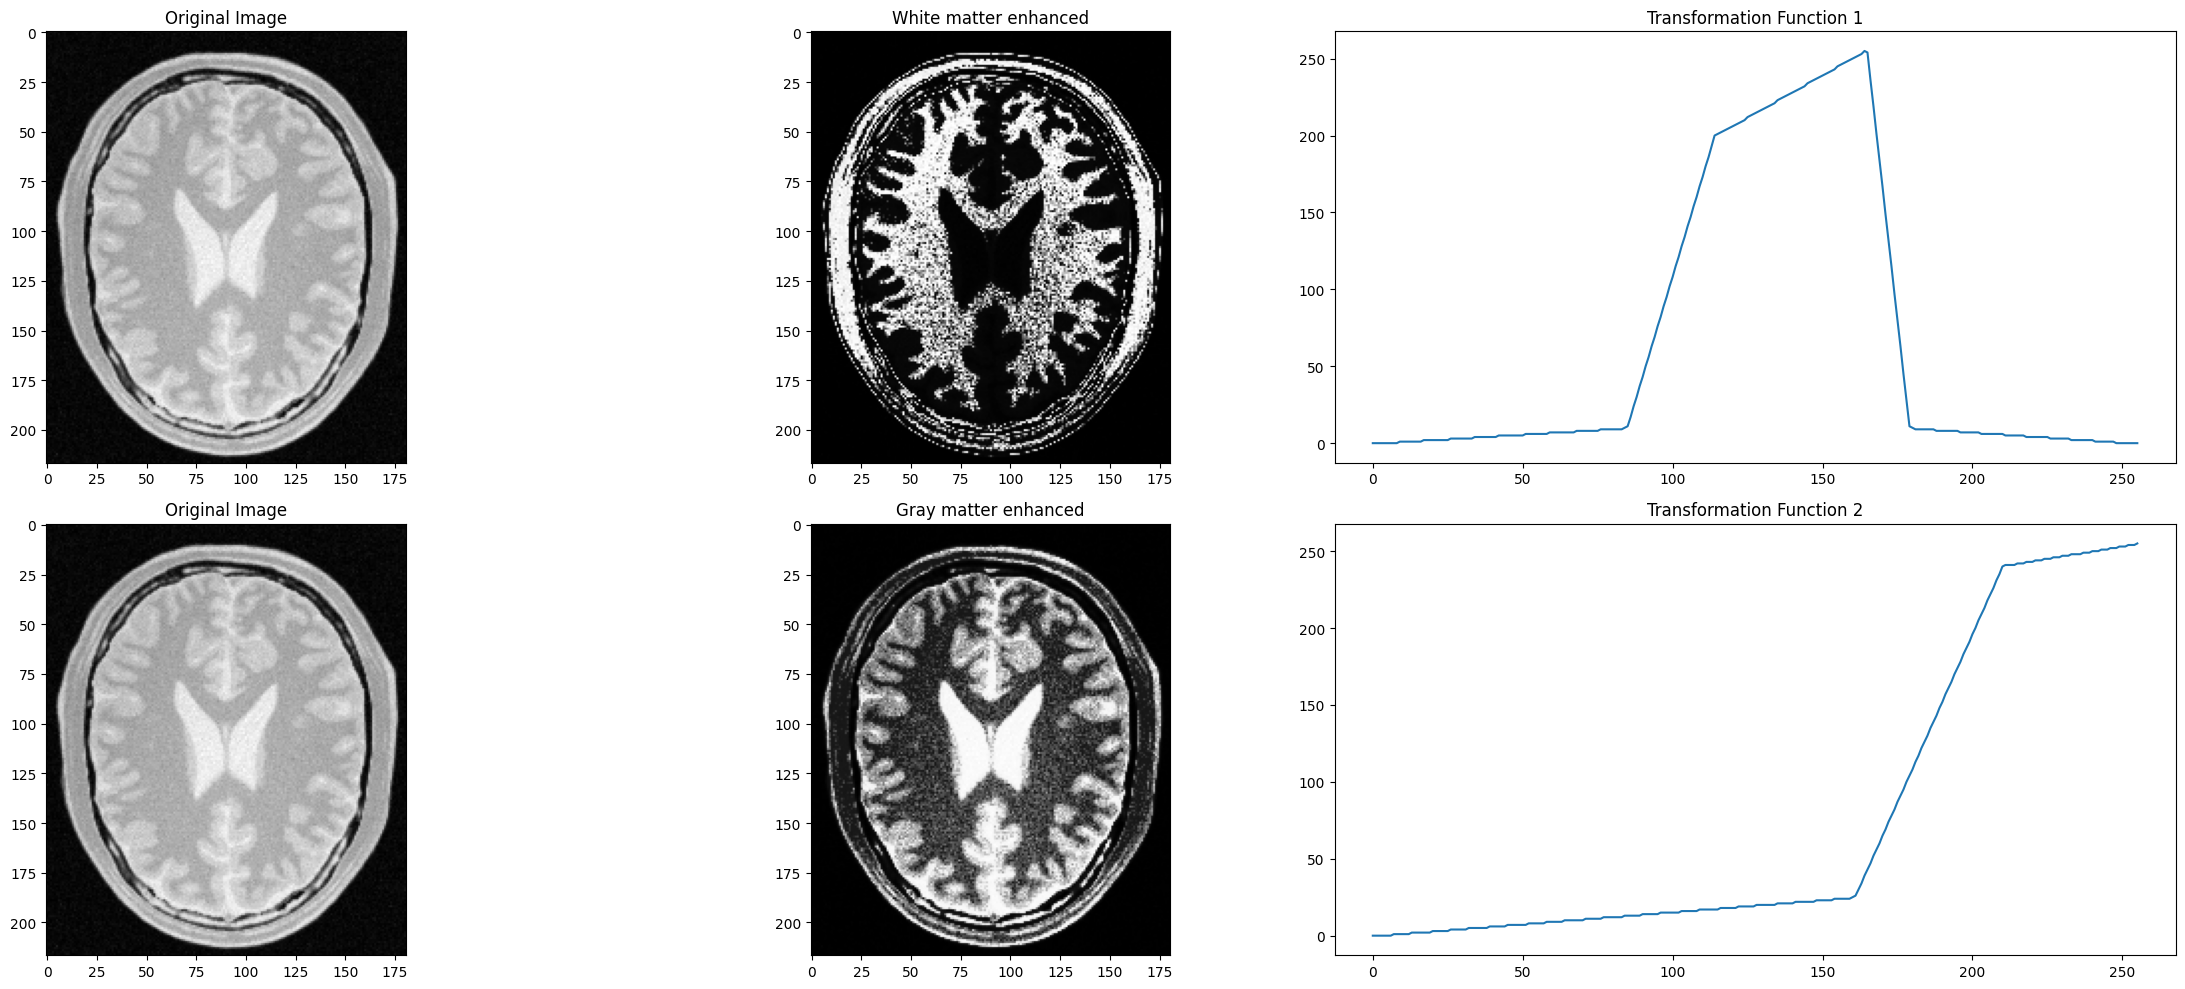

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to create the transformation and apply it to the image
def apply_transform(brain, transform):
    return cv.LUT(brain, transform)

# Creating the first linear transformation to enhance white matter
t1_1 = np.linspace(0, 10, 85).astype('uint8')
t2_1 = np.linspace(11, 200, 30).astype('uint8')
t3_1 = np.linspace(201, 255, 50).astype('uint8')
t4_1 = np.linspace(254, 11, 15).astype('uint8')
t5_1 = np.linspace(10, 0, 76).astype('uint8')
transform_1 = np.concatenate((t1_1, t2_1, t3_1, t4_1, t5_1), axis=0).astype('uint8')

# Creating the second linear transformation to enhance gray matter
t1_2 = np.linspace(0, 25, 161).astype('uint8')
t2_2 = np.linspace(26, 240, 50).astype('uint8')
t3_2 = np.linspace(241, 255, 45).astype('uint8')
transform_2 = np.concatenate((t1_2, t2_2, t3_2), axis=0).astype('uint8')

# Load the grayscale image
brain = cv.imread('/content/drive/MyDrive/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Apply the transformations
img_transformed_1 = apply_transform(brain, transform_1)
img_transformed_2 = apply_transform(brain, transform_2)

# Plot the original, transformed images, and their respective transformation functions
plt.figure(figsize=(24,10))

# First row: Original, Transformed 1, and its transformation function
plt.subplot(2, 3, 1)
plt.imshow(brain, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(img_transformed_1, cmap='gray')
plt.title('White matter enhanced')

plt.subplot(2, 3, 3)
plt.plot(transform_1)
plt.title('Transformation Function 1')

# Second row: Original, Transformed 2, and its transformation function
plt.subplot(2, 3, 4)
plt.imshow(brain, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 5)
plt.imshow(img_transformed_2, cmap='gray')
plt.title('Gray matter enhanced')

plt.subplot(2, 3, 6)
plt.plot(transform_2)
plt.title('Transformation Function 2')

plt.tight_layout()
plt.show()


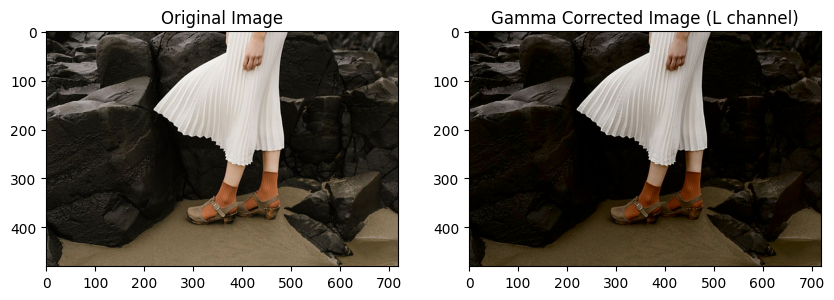

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread('/content/drive/MyDrive/a1images/highlights_and_shadows.jpg')
lab_img = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB) # Converting to LAB color space
l, a, b = cv.split(lab_img)

# Applying gamma correction to the L channel
gamma = 0.6
l_gamma = np.uint8(np.clip(255 * ((l / 255.0) ** (1.0 / gamma)), 0, 256))
img_corrected = cv.merge((l_gamma, a, b))#merging

# Convert back to BGR color space
image = cv.cvtColor(img_corrected, cv.COLOR_LAB2BGR)

# Plotting
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gamma Corrected Image (L channel)')

plt.show()


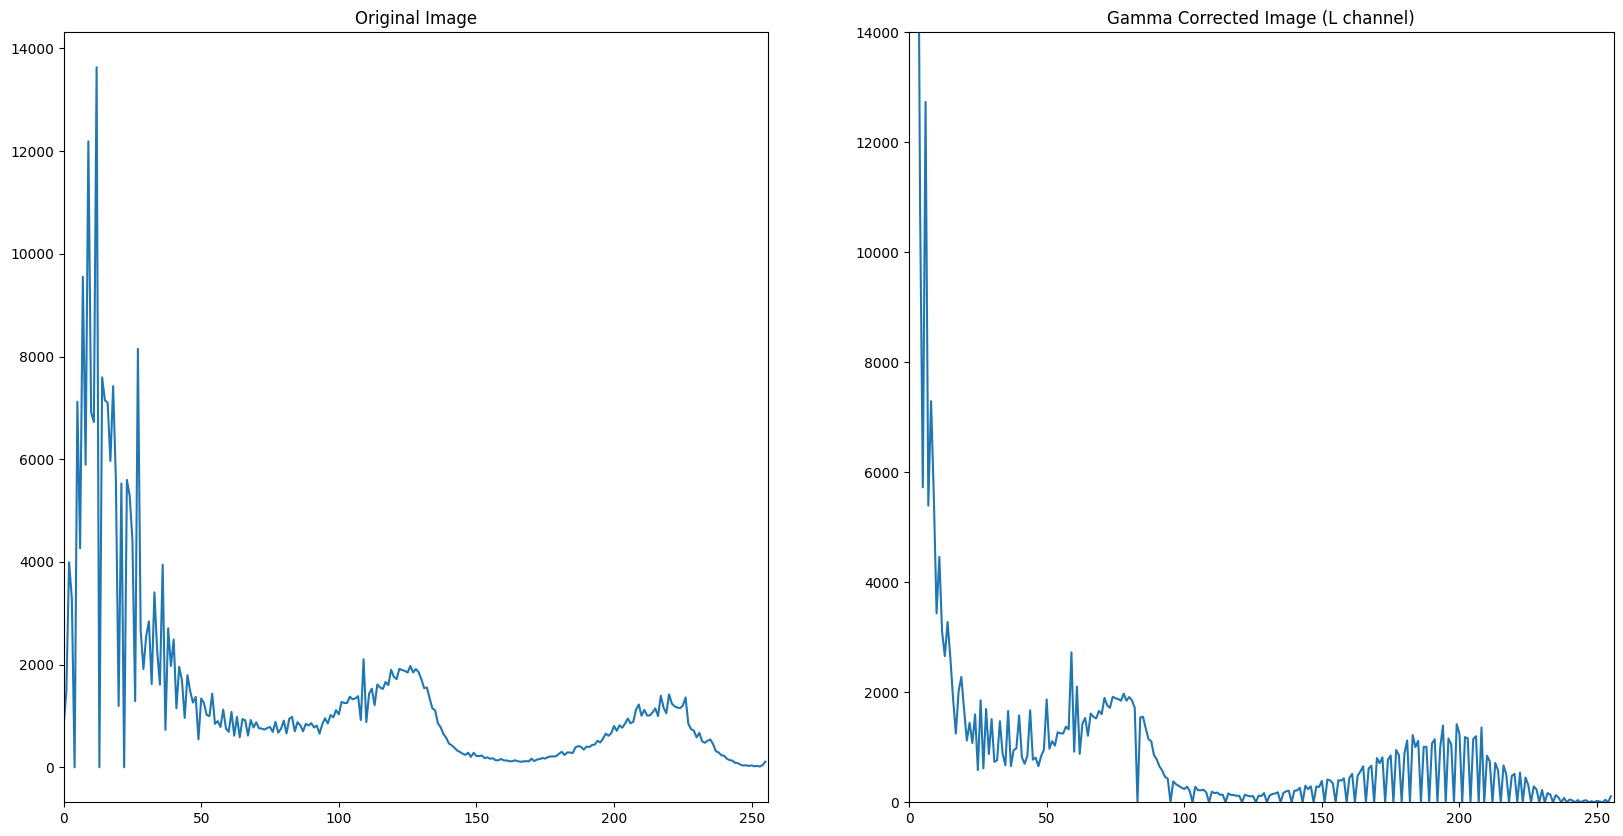

In [4]:
hist = cv.calcHist([lab_img], [0], None, [256], [0, 256])
hist1 = cv.calcHist([img_corrected], [0], None, [256], [0, 256])
# Plotting
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(hist)
plt.xlim(0,256)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(hist1)
plt.title('Gamma Corrected Image (L channel)')
plt.ylim(0,14000)
plt.xlim(0,256)

plt.show()

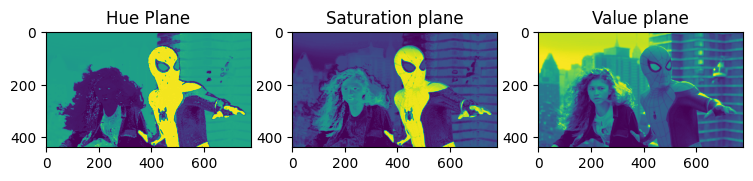

In [24]:
spider = cv.imread('/content/drive/MyDrive/a1images/spider.png',cv.IMREAD_COLOR)
spider = cv.cvtColor(spider, cv.COLOR_BGR2RGB)
spider = cv.cvtColor(spider, cv.COLOR_RGB2HSV) #converting into hsv plane
hue = spider[:,:,0]
saturation = spider[:,:,1]
value = spider[:,:,2]

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(hue)
plt.title('Hue Plane')

plt.subplot(1,3,2)
plt.imshow(saturation)
plt.title('Saturation plane')

plt.subplot(1,3,3)
plt.imshow(value)
plt.title('Value plane')
plt.show()


Text(0.5, 1.0, 'vibrance-enhanced image')

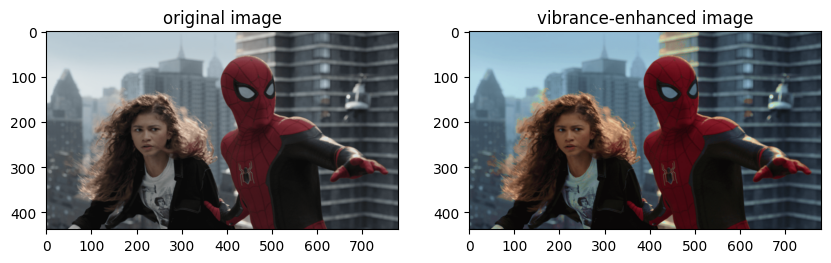

In [25]:
#defining the variables and the transformation function
alpha = 0.35
sigma = 70
transformed_saturation = np.minimum(saturation + (alpha * 128 * np.exp(-((saturation - 128)**2) / (2 * sigma**2))), 255)
#applying to saturation plane
transformed_saturation = transformed_saturation.astype(hue.dtype)

hsv_transformed = cv.merge([hue, transformed_saturation, value]) #merging the channels
spider_transformed = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2RGB)
spider_new = cv.imread('/content/drive/MyDrive/a1images/spider.png')
spider_new= cv.cvtColor(spider_new, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(spider_new)
plt.title('original image')

plt.subplot(1,2,2)
plt.imshow(spider_transformed)
plt.title('vibrance-enhanced image')



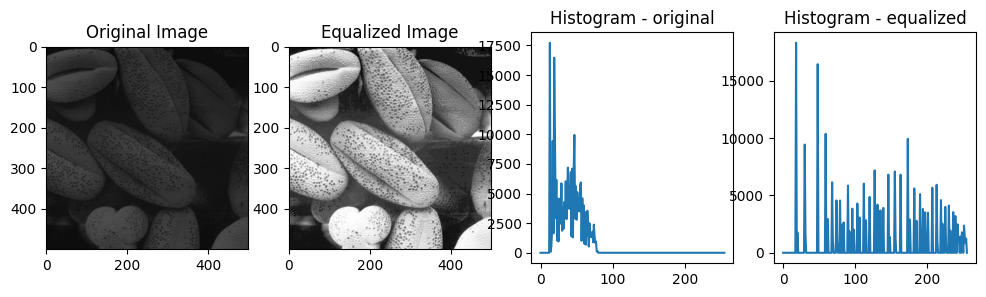

In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/MyDrive/a1images/shells.tif',cv.IMREAD_COLOR)
def histogram_equalization(image):
    # Define L, M, N for histogram equalization
    L = 256  # Number of intensity levels
    M, N, _ = image.shape  # Get the image dimensions

    #calculating the histogram
    hist = cv.calcHist([image], [0], None, [L], [0, L])

    #equalizing the histogram
    cumulative_hist = np.cumsum(hist)
    equalized_hist = np.array([(L-1)/(M*N)*cumulative_hist[k] for k in range(256)],dtype=np.uint8)
    eq_image= equalized_hist[image]
    return eq_image

equalized_image= histogram_equalization(image)
# Plot original and equalized images
plt.figure(figsize=(12,3))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display

plt.subplot(1, 4, 2)
plt.title('Equalized Image')
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display

# Plot histograms
plt.subplot(1, 4, 3)
plt.title('Histogram - original')
plt.plot(cv.calcHist([image], [0], None, [256], [0, 256]))


plt.subplot(1, 4, 4)
plt.title('Histogram - equalized')
plt.plot(cv.calcHist([equalized_image], [0], None, [256], [0, 256]))


plt.show()




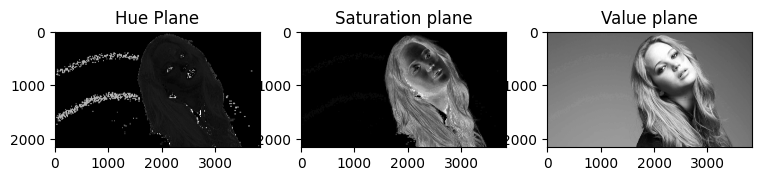

In [32]:
jenn_org = cv.imread('/content/drive/MyDrive/a1images/jeniffer.jpg',cv.IMREAD_COLOR)
jenn = cv.cvtColor(jenn_org, cv.COLOR_BGR2RGB)
jenn_hsv = cv.cvtColor(jenn, cv.COLOR_RGB2HSV)

hue_jenn = jenn_hsv[:,:,0]
saturation_jenn = jenn_hsv[:,:,1]
value_jenn = jenn_hsv[:,:,2]

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(hue_jenn,cmap='gray')
plt.title('Hue Plane')

plt.subplot(1,3,2)
plt.imshow(saturation_jenn,cmap='gray')
plt.title('Saturation plane')

plt.subplot(1,3,3)
plt.imshow(value_jenn,cmap='gray')
plt.title('Value plane')
plt.show()

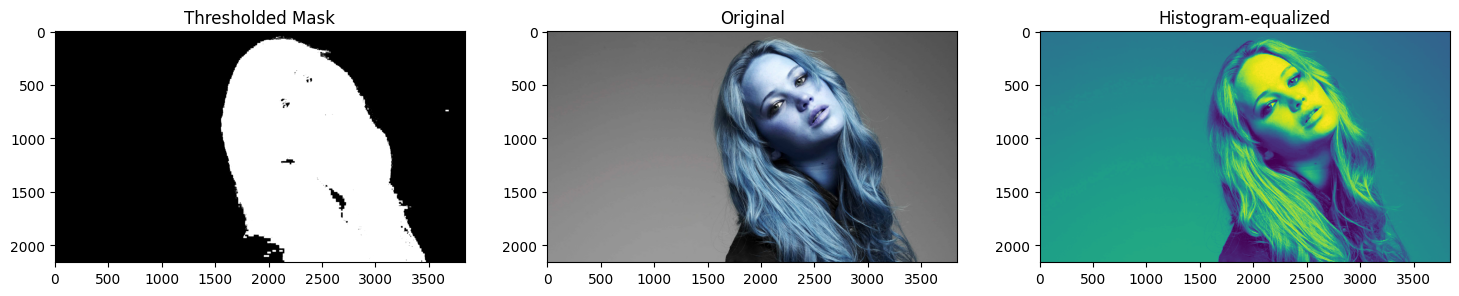

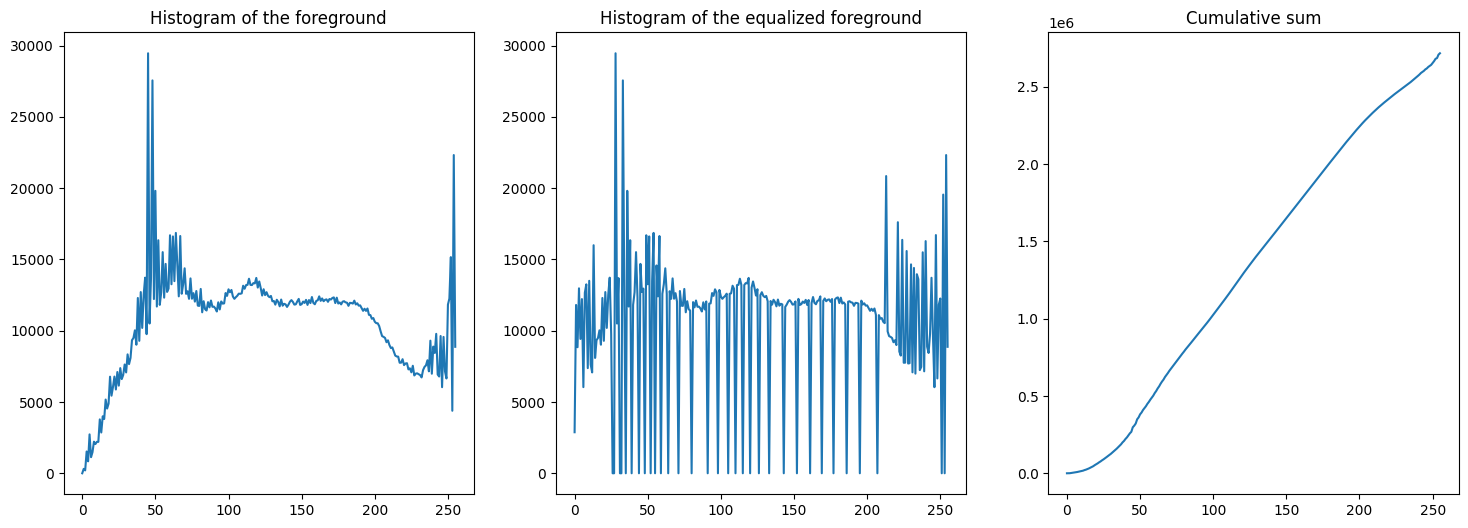

In [33]:

#Saturation plane for thresholding
_, mask = cv.threshold(saturation_jenn, 12, 255, cv.THRESH_BINARY) # Threshold the saturation plane
# foreground
foreground = cv.bitwise_and(value_jenn,mask) # Apply the mask to the value plane

#histogram calculating
hist_foreground = cv.calcHist([foreground], [0], mask, [256], [0, 256])

cumulative_hist = np.cumsum(hist_foreground)

# equalization
equalized_foreground = cv.equalizeHist(foreground)


#background - by inverting the mask
background = cv.bitwise_not(mask)
background_image = cv.bitwise_and(value_jenn, background)

# Add the equalized foreground with the background
result_value = cv.add(equalized_foreground, background_image)


image = cv.imread('/content/drive/MyDrive/a1images/jeniffer.jpg',cv.IMREAD_COLOR)

# Display results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(mask, cmap='gray')
ax[0].set_title("Thresholded Mask")
ax[1].imshow(image,cmap='gray')
ax[1].set_title("Original")
ax[2].imshow(result_value)
ax[2].set_title("Histogram-equalized")
plt.show()

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Histogram of the foreground')
plt.plot(hist_foreground)


plt.subplot(1,3,2)
plt.title('Histogram of the equalized foreground')
plt.plot(cv.calcHist([equalized_foreground], [0], mask, [256], [0, 256]))

plt.subplot(1,3,3)
plt.title('Cumulative sum')
plt.plot(cumulative_hist)
plt.show()

In [10]:
einstein = cv.imread('/content/drive/MyDrive/a1images/einstein.png', cv.IMREAD_GRAYSCALE)
assert einstein is not None

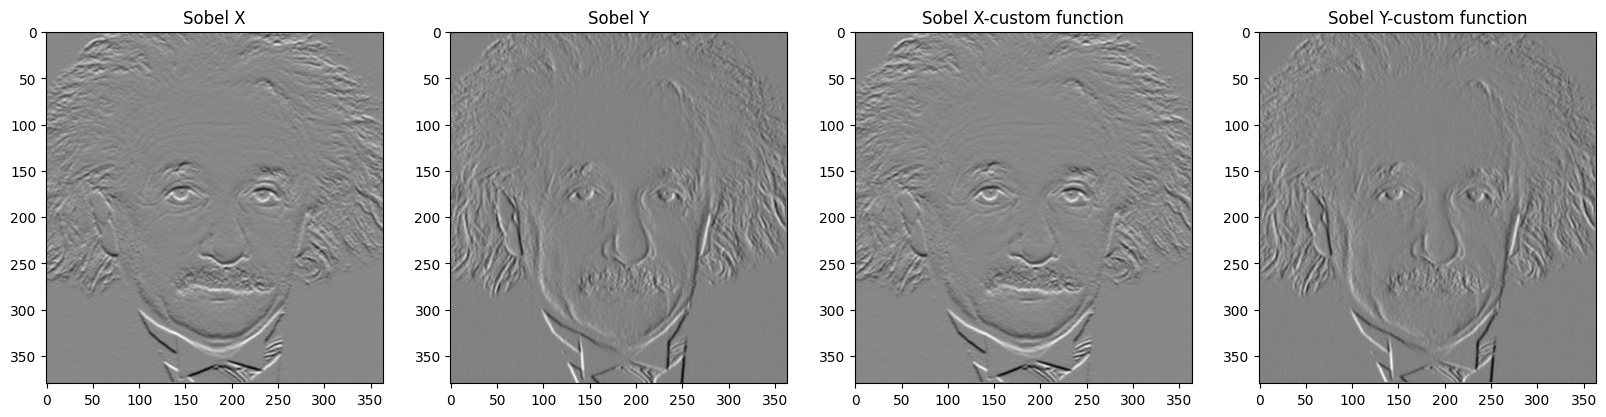

In [34]:
def sobel_filter(image, sobel_x, sobel_y):
    h, w = image.shape  # dimensions of the image
    # Initializing output arrays
    output_x = np.zeros((h, w), dtype=np.float64)
    output_y = np.zeros((h, w), dtype=np.float64)
    # Performing convolution
    for i in range(1, h-1):
        for j in range(1, w-1):
            output_x[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * sobel_x)
            output_y[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * sobel_y)
    return output_x, output_y
# Plot results
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
output_x, output_y = sobel_filter(einstein, sobel_x, sobel_y)
fig, ax = plt.subplots(1, 4, figsize=(20,5))


im_x = cv.filter2D(einstein, cv.CV_64F, sobel_x)
im_y = cv.filter2D(einstein, cv.CV_64F, sobel_y)

ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[2].imshow(output_x, cmap='gray')
ax[2].set_title('Sobel X-custom function')
ax[3].imshow(output_y, cmap='gray')
ax[3].set_title('Sobel Y-custom function')
plt.show()



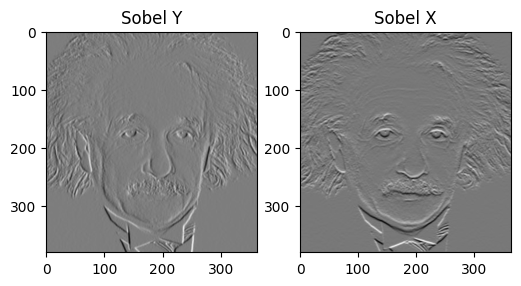

In [36]:
import numpy as np
import cv2 as cv
sobel_y = np.array([1,2,1], dtype=np.float32) # kernel
sobel_x = np.array([1,0,-1], dtype=np.float32) # kernel
img_sobel_y = cv.sepFilter2D(einstein,cv.CV_64F,sobel_x, sobel_y) # apply kernel to image
img_sobel_x = cv.sepFilter2D(einstein,cv.CV_64F, sobel_y, sobel_x) # apply kernel to image

fig, axes  = plt.subplots(1, 2, figsize=(6,3)) # create figure with 3 subplots
axes[0].imshow(img_sobel_y, cmap='gray')
axes[0].set_title('Sobel Y') # show sobel vertical image
axes[1].imshow(img_sobel_x, cmap='gray')
axes[1].set_title('Sobel X') # show sobel horizontal image
plt.show()

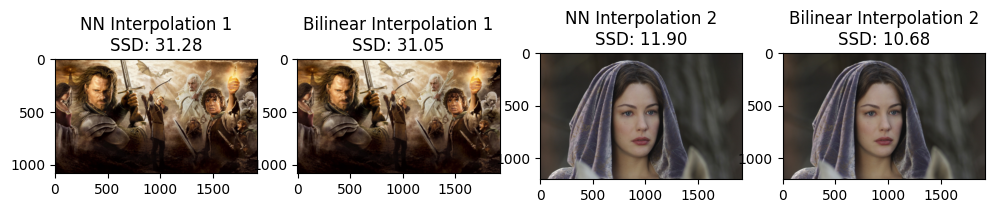

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def image_zooming(h, w, img_small, zooming_method):
    if zooming_method == 'nearestneighbour':
        img_zoomed = cv.resize(img_small, (4*w, 4*h), interpolation=cv.INTER_NEAREST)
    elif zooming_method == 'bilinear':
        img_zoomed = cv.resize(img_small, (4*w, 4*h), interpolation=cv.INTER_LINEAR)
    return img_zoomed

# Load and preprocess first image
img_small_1 = cv.imread('/content/drive/MyDrive/a1images/a1q5images/im01small.png', cv.IMREAD_COLOR)
h1, w1, d1 = img_small_1.shape
img_small_1 = cv.cvtColor(img_small_1, cv.COLOR_BGR2RGB)
img_zoomed_n1 = image_zooming(h1, w1, img_small_1, 'nearestneighbour')
img_zoomed_l1 = image_zooming(h1, w1, img_small_1, 'bilinear')

org_1 = cv.imread('/content/drive/MyDrive/a1images/a1q5images/im01.png', cv.IMREAD_COLOR)
org_1 = cv.cvtColor(org_1, cv.COLOR_BGR2RGB)

# Load and preprocess second image
img_small_2 = cv.imread('/content/drive/MyDrive/a1images/a1q5images/im02small.png', cv.IMREAD_COLOR) # Load a second image
h2, w2, d2 = img_small_2.shape
img_small_2 = cv.cvtColor(img_small_2, cv.COLOR_BGR2RGB)
img_zoomed_n2 = image_zooming(h2, w2, img_small_2, 'nearestneighbour')
img_zoomed_l2 = image_zooming(h2, w2, img_small_2, 'bilinear')

org_2 = cv.imread('/content/drive/MyDrive/a1images/a1q5images/im02.png', cv.IMREAD_COLOR) # Load the original of the second image
org_2 = cv.cvtColor(org_2, cv.COLOR_BGR2RGB)

# Compute SSD for first image pair (Nearest Neighbor & Bilinear Interpolation)
ssd_n1 = np.sum((org_1 - img_zoomed_n1)**2) / (16 * h1 * w1 * d1)
ssd_b1 = np.sum((org_1 - img_zoomed_l1)**2) / (16 * h1 * w1 * d1)

# Compute SSD for second image pair (Nearest Neighbor & Bilinear Interpolation)
ssd_n2 = np.sum((org_2 - img_zoomed_n2)**2) / (16 * h2 * w2 * d2)
ssd_b2 = np.sum((org_2 - img_zoomed_l2)**2) / (16 * h2 * w2 * d2)

# Plot original images and zoomed images for both nearest neighbor and bilinear interpolation
plt.figure(figsize=(12,3))

# First image (Nearest Neighbor and Bilinear)
plt.subplot(1, 4, 1)
plt.imshow(img_zoomed_n1)
plt.title(f'NN Interpolation 1\nSSD: {ssd_n1:.2f}')


plt.subplot(1, 4, 2)
plt.imshow(img_zoomed_l1)
plt.title(f'Bilinear Interpolation 1\nSSD: {ssd_b1:.2f}')

plt.subplot(1, 4, 3)
plt.imshow(img_zoomed_n2)
plt.title(f'NN Interpolation 2\nSSD: {ssd_n2:.2f}')

# Second image (Nearest Neighbor and Bilinear)
plt.subplot(1, 4, 4)
plt.imshow(img_zoomed_l2)
plt.title(f'Bilinear Interpolation 2\nSSD: {ssd_b2:.2f}')


plt.show()



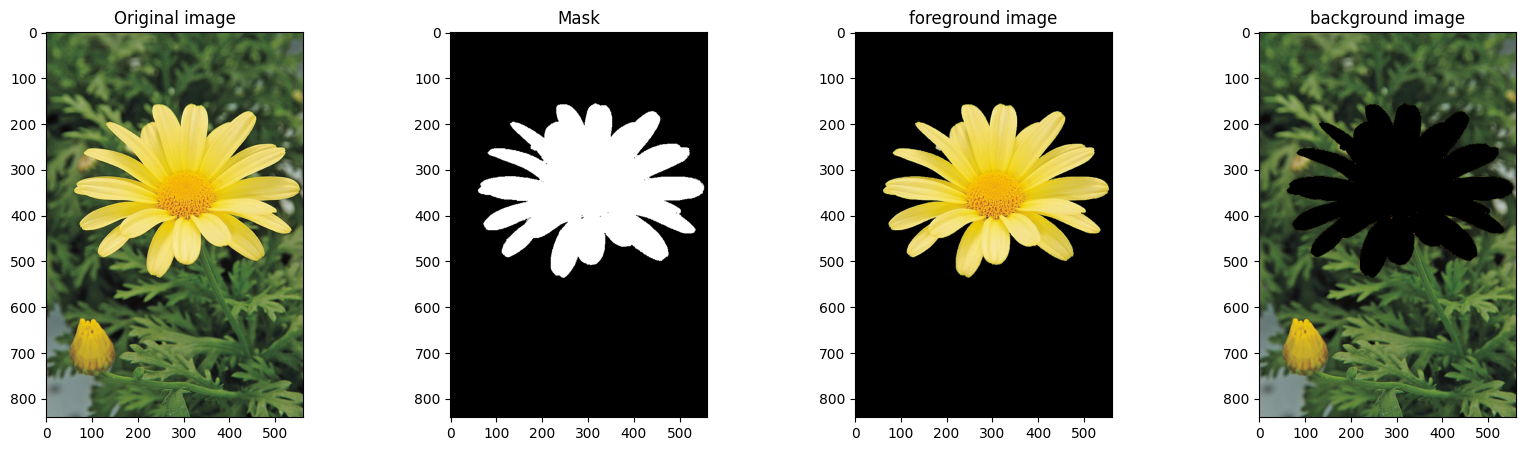

In [40]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/a1images/daisy.jpg',cv.IMREAD_COLOR)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

assert img is not None
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,600,600)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_masked = img*mask2[:,:,np.newaxis]

mask3 = np.where((mask==3)|(mask==1),0,1).astype('uint8')
background = img * mask3[:,:,np.newaxis]
foreground = img * mask2[:,:,np.newaxis]

# Plotting
plt.figure(figsize=(20,5))


plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original image')


plt.subplot(1, 4, 2)
plt.imshow(mask2,cmap='gray')
plt.title('Mask')

plt.subplot(1, 4, 3)
plt.imshow(foreground)
plt.title('foreground image')


plt.subplot(1, 4, 4)
plt.imshow(background)
plt.title('background image')


plt.show()





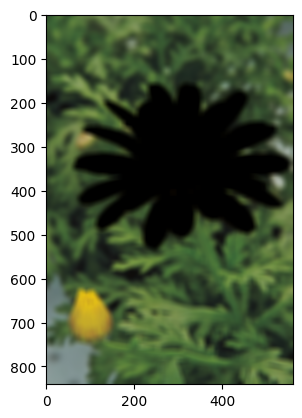

In [41]:
avging = cv.blur(background,(15,15))
plt.imshow(avging)
plt.show()

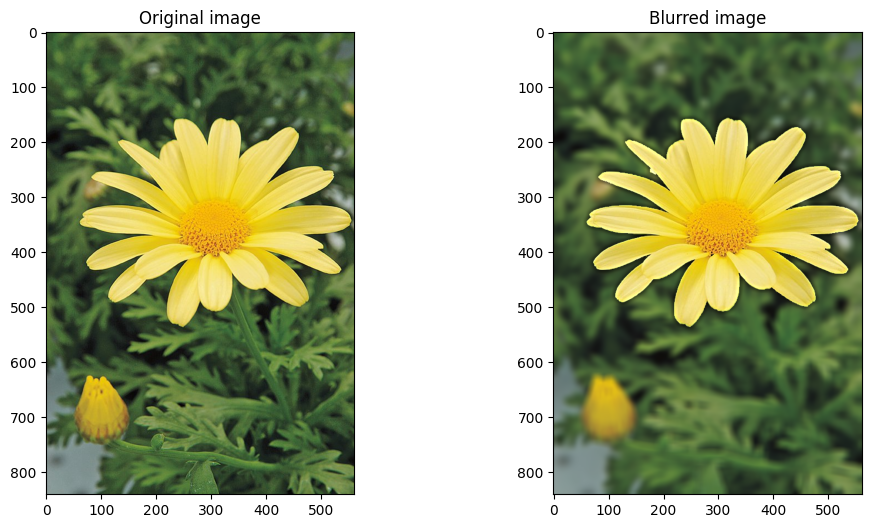

In [42]:
final = cv.add(cv.cvtColor(foreground,cv.COLOR_BGR2RGB),cv.cvtColor(avging,cv.COLOR_BGR2RGB))

plt.figure(figsize=(12,6))

# Plotting original image and the blurred image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')


plt.subplot(1, 2, 2)

plt.imshow(cv.cvtColor(final,cv.COLOR_BGR2RGB))
plt.title('Blurred image')

plt.show()